<h1 style="text-align: center; vertical-align: middle;">Numerical Methods in Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Lecture Series by Dr. Adrian Oeftiger</h2>

<div style="width: 45%; margin: auto; margin-top: 1em; vertical-align: middle;">
<img src="./img/etit.png" style="width: 30%; float: left; margin-right: 5%;" /><img src="./img/GSI_Logo.png" style="width: 35%; float: left; margin-right: 5%; padding-top: 0.5em;" /><img src="./img/FAIR_Logo.png" style="width: 25%; float: left;" />
</div>

<h3 style="clear: both; text-align: center; margin-top: 1em;">Lecture 7</h3>

<h2>Run this notebook online!</h2>

Interact and run this jupyter notebook online:

<div class="alert alert-block alert-info" style="text-align:center;">
via the public mybinder.org service: <br />
<a href="https://mybinder.org/v2/gh/aoeftiger/TUDa-NMAP-2023/v7.0" style="width:auto; display:table;margin:0.5em auto;"><img src="./img/binder_logo.svg" alt="mybinder.org logo" height="1ex" /></a>
</div>

<div class="alert alert-block alert-info" style="text-align:center;">
via the public gesis.org service: <br />
<a href="https://notebooks.gesis.org/binder/v2/gh/aoeftiger/TUDA-NMAP-2023/v7.0" style="width:auto; display:table;margin:0.5em auto;"><img src="./img/binder_logo.svg" alt="gesis.org logo" height="1ex" /></a>
</div>

Also find this lecture rendered [as HTML slides on github $\nearrow$](https://aoeftiger.github.io/TUDa-NMAP-2023/) along with the [source repository $\nearrow$](https://github.com/aoeftiger/TUDa-NMAP-2023).

<h2>Run this first!</h2>

Imports and modules:

In [1]:
from config import (np, plt)
from scipy.constants import m_p, e, c
%matplotlib inline

<h2 style="color: #b51f2a">Refresher!</h2>

- full simulation of acceleration ramp, incl. transition crossing: <br />"classical" vs. "relativistic" regime and $\varphi_s\mapsto\pi-\varphi_s$ synchronous phase adjustment
- equilibrium distributions with nonlinear Hamiltonian (vs. linear/harmonic oscillation Hamiltonian)
- matching algorithm (iterate on $\mathcal{H}_0$ until target rms bunch length $\hat{\sigma}_z$ is reached)
- root-finding problem (Brent-Dekker or secant algorithm to find root)
- emittance growth mechanisms (numerical + physical: dipole and quadrupole injection mismatch)

<h2 style="color: #b51f2a">Today!</h2>

1. Magnetic Fields: Dipoles, Quadrupoles, Sextupoles
2. Linear Transverse Beam Dynamics

<div style="text-align: center; width:100%;">
    <h2>Part I: Magnetic Fields: Dipoles, Quadrupoles, Sextupoles</h2>
</div>

<h2>Magnetic or Electric Fields</h2>

The effect of a magnetic field or an electric field to bend a particle around the corner is described by the Lorentz force:

$$\mathbf{F}_L=q(\mathbf{E} + \mathbf{v}\times \mathbf{B})$$

To produce a given bending / force $F_L$, a magnetic field of 1T would therefore correspond to an equivalent electric field of...

In [2]:
gamma = 1 + 10**np.linspace(-5, 1, 1000)

def beta(gamma):
    return np.sqrt(1 - gamma**-2)

Text(0, 0.5, '$E$ [MV/m]')

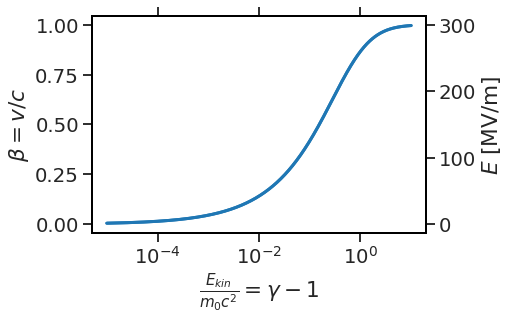

In [3]:
plt.plot(gamma - 1, beta(gamma))
plt.xscale('log')
plt.xlabel(r'$\frac{E_{kin}}{m_0c^2} = \gamma-1$')
plt.ylabel(r'$\beta=v/c$')
plt.twinx()
plt.plot(gamma - 1, 1e-6 * beta(gamma) * c * 1)
plt.ylabel('$E$ [MV/m]')

Electrons have a rest mass of $m_0c^2\approx 511$ keV and protons of $m_0c^2\approx 938$ MeV. 

<p style="color: #e6541a;">$\implies$ Consider an E-field of 100 MV/m. At what (low) kinetic energy is a 1T B-field equivalent to this very high E-field in terms of the Lorentz force? Compare this energy to the tables of energies reached in the CERN and GSI accelerators, cf. first lecture!</p>

<h2>Beth Representation / Multipole Expansion</h2>

Transverse magnetic fields $B_{x,y}$ can be expanded in a multipole series, also known as the Beth representation:

$$B_x + iB_y = B_0 \sum\limits_{n=1}^\infty (b_n + ia_n)\cdot (x+iy)^{n-1}$$

The $b_n,a_n$ are the multipole coefficients for the normal and skew components, respectively, and $B_0$ refers to the main (dipole) field.

$$\begin{align}\,
n=1&\text{: dipole} \\
n=2&\text{: quadrupole} \\
n=3&\text{: sextupole} \\
n=4&\text{: octupole} \\
&...
\end{align}$$

"Skew" refers to half a symmetry period rotation, so if an upright normal dipole has its field in the vertical direction and dipole fields have a symmetry of 180deg, then a skew dipole would have a horizontal field (rotated by 180deg/2 = 90deg). A skew quadrupole is correspondingly rotated by 45deg, a skew sextupole by 30deg, etc.

As example: in the $y=0$ plane, no $B_x$ terms appear and $x\cdot y$ cross-terms vanish, the B-field can be Taylor-expanded as

$$\cfrac{B_y}{B\rho} = \underbrace{\phantom{\biggl|}\frac{1}{\rho_0}}\limits_\text{dipole} + \underbrace{\phantom{\biggl|}k\cdot x}\limits_\text{quadrupole} + \underbrace{\phantom{\biggl|}\frac{1}{2!} m x^2}\limits_\text{sextupole} + \underbrace{\phantom{\biggl|}\frac{1}{3!} r x^3}\limits_\text{octupole} + \cdots $$

with the beam rigidity $B\rho=\frac{p}{q}$.

<h2>Dipole Fields</h2>

Const. field in vertical direction $y$ with $b_1=1$ for the main dipoles.

<h2>Quadrupole Fields</h2>

Normal quadrupole field: $\mathbf{B}=\underbrace{B_0\cdot b_2}\limits_{\mathop{\doteq}-G} \cdot \begin{pmatrix} y \\ x \\ 0 \end{pmatrix}$

Skew quadrupole field: $\mathbf{B}=B_0\cdot a_2 \cdot \begin{pmatrix} x \\ -y \\ 0 \end{pmatrix}$

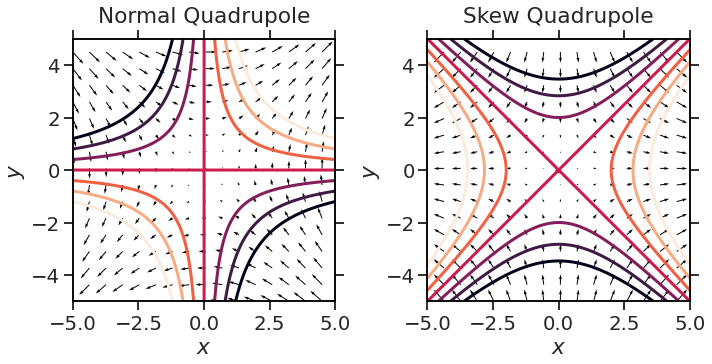

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for a in ax: a.set_aspect('equal')

xlist = np.linspace(-5.0, 5.0, 80)
ylist = np.linspace(-5.0, 5.0, 80)
X, Y = np.meshgrid(xlist, ylist)
Zn = X * Y
Zs = (X * X - Y * Y) / 2
levels = np.arange(-6, 6.1, 2)

plt.sca(ax[0])
plt.contour(X, Y, Zn, levels)
plt.quiver(X[::5,::5], Y[::5,::5], Y[::5,::5], X[::5,::5])
plt.title('Normal Quadrupole', y=1.04)
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.sca(ax[1])
plt.contour(X, Y, Zs, levels)
plt.quiver(X[::5,::5], Y[::5,::5], X[::5,::5], -Y[::5,::5])
plt.title('Skew Quadrupole', y=1.04)
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()

<h2>Sextupole Fields</h2>

Normal sextupole field: $\mathbf{B}=B_0\cdot b_3 \cdot \begin{pmatrix} 2xy \\ x^2-y^2 \\ 0 \end{pmatrix}$

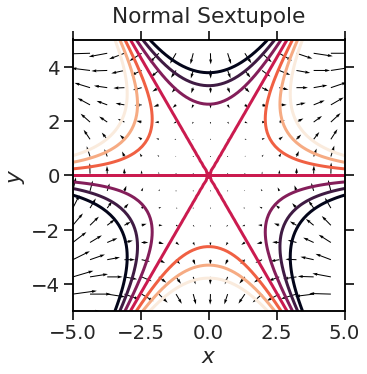

In [5]:
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
xlist = np.linspace(-5.0, 5.0, 80)
ylist = np.linspace(-5.0, 5.0, 80)
X, Y = np.meshgrid(xlist, ylist)
Zn = (3 * X**2 * Y - Y**3) / 3
levels = np.arange(-6, 6.1, 2) * 3

plt.title('Normal Sextupole', y=1.04)
plt.contour(X, Y, Zn, levels)
plt.quiver(X[::5,::5], Y[::5,::5], (2 * X * Y)[::5,::5], (X * X - Y * Y)[::5,::5])
plt.xlabel('$x$')
plt.ylabel('$y$');

<div style="text-align: center; width:100%;">
    <h2>Part II: Linear Transverse Beam Dynamics</h2>
</div>

<h2>Equation of Motion</h2>

Applying paraxial approximation ($v_x,v_y\ll |\mathbf{v}| = \beta c$), the equations of motion for the particles in transversely magnetic fields yield

$$\left\{\begin{matrix}
    \cfrac{d^2x}{ds^2} + \cfrac{B_y}{B\rho} = 0 \\
    \cfrac{d^2y}{ds^2} - \cfrac{B_x}{B\rho} = 0
\end{matrix}\right.$$

As long as $B_{y,x}$ depend up to linearly on $x,y$, these ordinary differential equations are <b>linear</b>.

<h2>Motion in Quadrupole Magnet</h2>

The field in normal quadrupole is given by $B_y=-G\cdot x$ and $B_x=-G\cdot y$, define the <b>quadrupole strength</b>

$$k \doteq - \cfrac{G}{B\rho}$$

where $k>0$ ($G<0$) for a focusing magnet (horizontally (!) stable motion in the $x$ plane). With $x'\doteq dx/ds$, the equation of motion reads

$$\left\{\begin{matrix}\,
    x'' + k\cdot x &= 0 \\
    y'' - k\cdot y &= 0 \end{matrix}\right.$$
    
with $\cos,\sin$ solution for the stable harmonic oscillation equation where $u''=-|k|u$ and hyperbolic $\cosh,\sinh$ solution for the unstable equation where $u''=+|k|u$. ($u$ is either $x$ or $y$, depending on $k$)

<p style="color: red;">$\implies$ in a quadrupole, one direction always focuses while the other direction defocuses! Remember Earnshaw's theorem!</p>

In case of a drift, $k=0$, $u$ continues to increase with the angle $u'$ times the path length $s$.

<h2>Motion in Dipole Magnet</h2>

<b>Geometric focusing</b> due to longer path length in dipole field for positive $x$, equation of motion reads:

$$\left\{\begin{matrix}\,
x'' + \cfrac{1}{\rho_0{}^2} \cdot x &= 0 \\
y'' &= 0\end{matrix}\right.$$

<h2>Hill Differential Equation</h2>

Piecing together drifts, normal dipoles and normal quadrupoles to a magnet sequence, the <b>lattice</b> of the accelerator, one obtains the <b>Hill equation</b>

$$\left\{\begin{matrix}\,
    x'' &\mathop{+}\, \left(\cfrac{1}{\rho_0(s)} + k(s)\right)&\mathop{\cdot} x = 0 \\
    y'' &\mathop{-} k(s)&\mathop{\cdot} y = 0
\end{matrix}\right.$$

where the dipole curvature radius $\rho_0(s)$ and the quadrupole strength $k(s)$ are typically piecewise constant.

$\implies$ can use transverse matrix formalism for each (linear) magnet, the <b>betatron matrices</b> $\mathcal{M}$, to transport through each element from $s_0$ to $s_0+s$:

$$\begin{pmatrix} x \\ x' \end{pmatrix}_{s_0+s} = \mathcal{M}(s_0+s, s_0) \begin{pmatrix} x \\ x' \end{pmatrix}_{s_0}$$



<h2>Betatron Matrices</h2>

A drift section: 
$$\mathcal{M}_\text{drift} = \begin{pmatrix}\,1 &s \\ 0 & 1\end{pmatrix}$$

A thick dipole magnet: 
$$\mathcal{M}_\text{dipole}^x = \begin{pmatrix}\,\cos\left(\frac{s}{\rho_0}\right) &\rho_0 \sin\left(\frac{s}{\rho_0}\right) \\ -\frac{1}{\rho_0}\sin\left(\frac{s}{\rho_0}\right) & \cos\left(\frac{s}{\rho_0}\right)\end{pmatrix} 
\qquad \text{and}\qquad 
\mathcal{M}_\text{dipole}^{y} = \mathcal{M}_\text{drift}
$$

A thick quadrupole magnet:

$$\mathcal{M}^\text{foc}_\text{quadrupole} = \begin{pmatrix}\,\cos(\sqrt{|k|}\cdot s) & \frac{1}{\sqrt{|k|}}\sin(\sqrt{|k|}\cdot s) \\ -\sqrt{|k|} \sin(\sqrt{|k|}\cdot s) & \cos(\sqrt{|k|}\cdot s) \end{pmatrix}
$$

$$\mathcal{M}^\text{defoc}_\text{quadrupole} = \begin{pmatrix}\,\cosh(\sqrt{|k|}\cdot s) & \frac{1}{\sqrt{|k|}}\sinh(\sqrt{|k|}\cdot s) \\ \sqrt{|k|} \sinh(\sqrt{|k|}\cdot s) & \cosh(\sqrt{|k|}\cdot s) \end{pmatrix}$$

where a focusing quadrupole $k>0$ uses $\mathcal{M}^\text{foc}_\text{quadrupole}$ for the $x$-plane and $\mathcal{M}^\text{defoc}_\text{quadrupole}$ for the $y$-plane. Vice versa for a defocusing quadrupole.

In [6]:
def M_drift(L):
    return np.array([
        [1, L],
        [0, 1]
    ])

def M_dip_x(L, rho0):
    return np.array([
        [np.cos(L / rho0), rho0 * np.sin(L / rho0)],
        [-1 / rho0 * np.sin(L / rho0), np.cos(L / rho0)]
    ])

def M_dip_y(L, rho0):
    return M_drift(L)

def M_quad_x(L, k):
    ksq = np.sqrt(k + 0j)
    return np.array([
        [np.cos(ksq * L), 1 / ksq * np.sin(ksq * L)],
        [-ksq * np.sin(ksq * L), np.cos(ksq * L)]
    ]).real

def M_quad_y(L, k):
    ksq = np.sqrt(k + 0j)
    return np.array([
        [np.cosh(ksq * L), 1 / ksq * np.sinh(ksq * L)],
        [ksq * np.sinh(ksq * L), np.cosh(ksq * L)]
    ]).real

In [7]:
def track(M, u, up):
    '''Apply M to each individual [u;up] vectors value.'''
    return np.einsum('ij,...j->i...', M, np.vstack((u, up)).T)

<!--def track_M_drift(u, up, s):
    return u + up * s, up

def track_M_dip_x(x, xp, s, rho0):
    xnew = np.cos(s / rho0) + rho0 * np.sin(s / rho0)
    xpnew = -1 / rho0 * np.sin(s / rho0) + np.cos(s / rho0)
    return xnew, xpnew
    
track_M_dip_y = track_M_drift

def track_M_quad_x(x, xp, s, k):
    ksq = np.sqrt(k + 0j) # potentially complex ksq
    xnew = np.cos(ksq * s) * x + 1 / ksq * np.sin(ksq * s) * xp
    xpnew = -ksq * np.sin(ksq * s) * x + np.cos(ksq * s) * xp
    return xnew, xpnew

def track_M_quad_y(y, yp, s, k):
    ksq = np.sqrt(k + 0j) # potentially complex ksq
    ynew = np.cosh(ksq * s) * y + 1 / ksq * np.sinh(ksq * s) * yp
    ypnew = -ksq * np.sinh(ksq * s) * y + np.cosh(ksq * s) * yp
    return ynew, ypnew-->

<h2>Thin Approximation</h2>

For very short lengths of the magnets $L\rightarrow 0$, one can derive the following triangular matrices under the so-called <b>thin approximation</b> $f=\lim\limits_{L\rightarrow 0} \cfrac{1}{|k|\cdot L}$:
    
$$\mathcal{M}^\text{foc}_\text{thin-quadrupole} = \begin{pmatrix}\,1 & 0 \\ -\frac{1}{f} & 1 \end{pmatrix}$$

$$\mathcal{M}^\text{defoc}_\text{thin-quadrupole} = \begin{pmatrix}\,1 & 0 \\ \frac{1}{f} & 1 \end{pmatrix}$$

as well as 

$$\mathcal{M}^\text{x}_\text{thin-dipole} = M_\text{drift}$$

<h2>Thin Sextupole Kick</h2>

The motion through a regular sextupole magnet of strength $m$ and length $L$ cannot be represented by a (betatron) matrix since the magnetic field is <b>non-linear</b>.

In thin approximation, an infinitesimally long sextupole magnet of integrated strength $mL$ applies only an update of the momentum (angle):

$$\left\{\begin{matrix}\,
    x'_\text{after} &= x'_\text{before} \,+ &\frac{1}{2} m (y^2 - x^2)\cdot L  \\
    y'_\text{after} &= y'_\text{before} \,+ &m \cdot x \cdot y \cdot L
\end{matrix}\right.$$

In [8]:
def track_sext_4D(x, xp, y, yp, mL):
    xp += 0.5 * mL * (y * y - x * x)
    yp += mL * x * y
    return x, xp, y, yp

<h2>Properties of Betatron Matrices</h2>

<b>Liouville</b> applies to $x-x'$ space in the case of no acceleration $\leadsto$ <b>phase space</b>!

The betatron matrices $\mathcal{M}$ are thus <b>symplectic</b> and the 2x2 matrices obey

$$\det(\mathcal{M}) = 1$$

<p style="color: #e6541a;">$\implies$ verify this!</p>

Can build lattice matrix or one-turn-matrix $\mathcal{M}$ by multiplying all subsequent elements in lattice!

Long-term <b>stability</b> of 2x2 matrix $\mathcal{M}$ then requires eigenvalues $|\lambda|\leq 1$ $\Longleftrightarrow$ $|\mathrm{Tr}(\mathcal{M})| \leq 2$

<h2>Simulation Exercises</h2>

### 1. Simulating a drift:

In [9]:
np.random.seed(12345)

In [10]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

In [11]:
ds = 0.01

D = M_drift(ds)

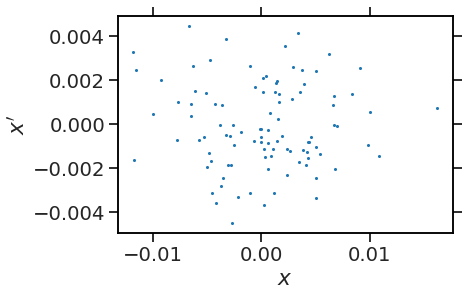

In [12]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

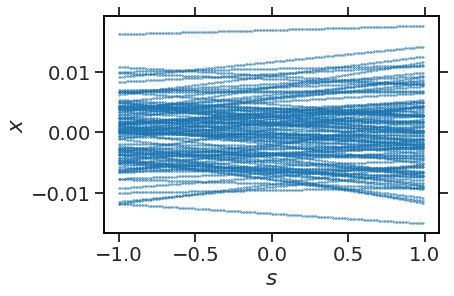

In [13]:
for s in np.arange(-1, 1, ds):
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

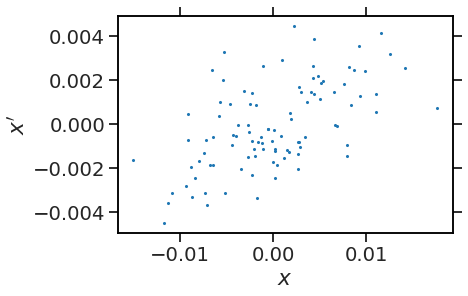

In [14]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

### Same simulation again with correlated $x, x'$:

$\implies$ demonstrates the eventual divergence after long enough drifts

In [15]:
np.random.seed(12345)

In [16]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp / 2, N) - x * sig_x / sig_xp * 0.4

In [17]:
ds = 0.01

D = M_drift(ds)

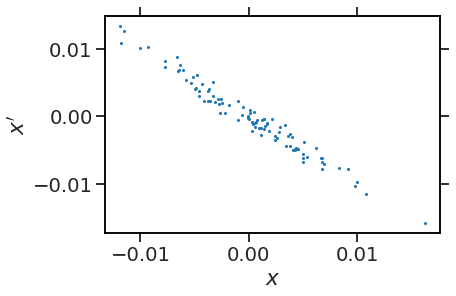

In [18]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

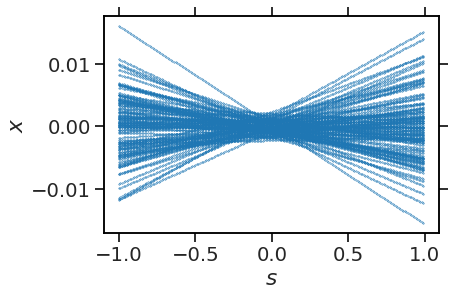

In [19]:
for s in np.arange(-1, 1, ds):
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

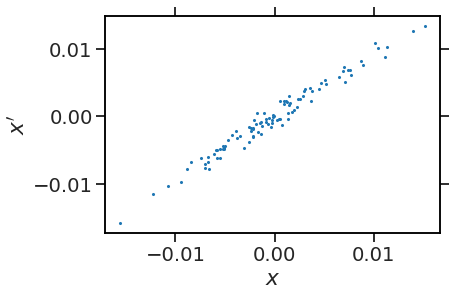

In [20]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

$\implies$ particles move (drift) for- and backward along $x$ depending on their momentum (angle) $x'$!

### 2. Simulating a quadrupole in focusing plane:

In [21]:
np.random.seed(12345)

In [22]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

In [23]:
ds = 0.01

Qx = M_quad_x(ds, 10)

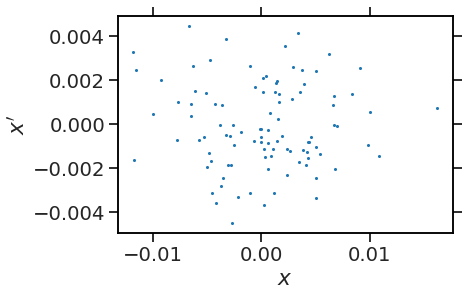

In [24]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

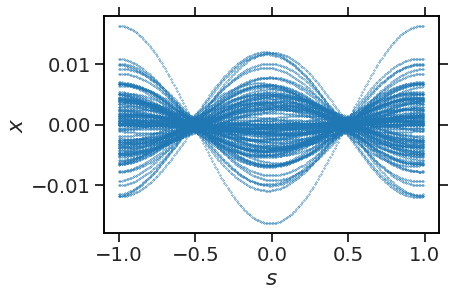

In [25]:
for s in np.arange(-1, 1, ds):
    x, xp = track(Qx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

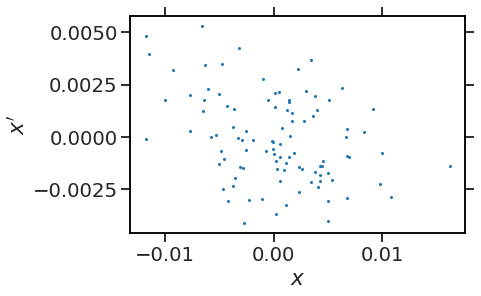

In [26]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

<p style="color: #e6541a;">$\implies$ Is it possible to build a storage ring consisting only of focusing quadrupole? Where is the caveat?</p>

### 3. Simulating a quadrupole in defocusing plane:

In [27]:
np.random.seed(12345)

In [28]:
N = 100
sig_x = 5e-3
sig_xp = 2e-3

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

Note the <b>negative sign</b> for the $k$ to obtain defocusing in the horizontal plane:

In [29]:
ds = 0.01

Qx = M_quad_x(ds, -10)

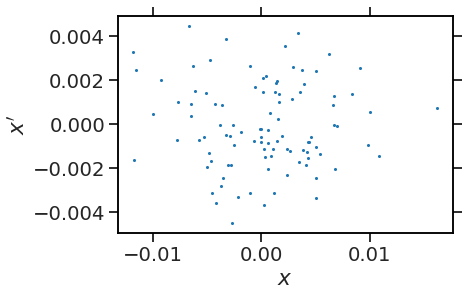

In [30]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

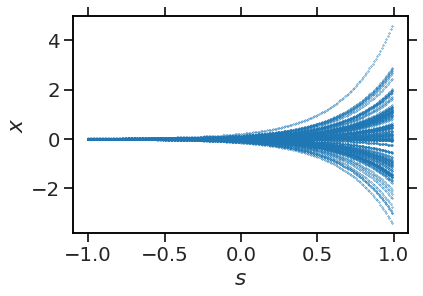

In [31]:
for s in np.arange(-1, 1, ds):
    x, xp = track(Qx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

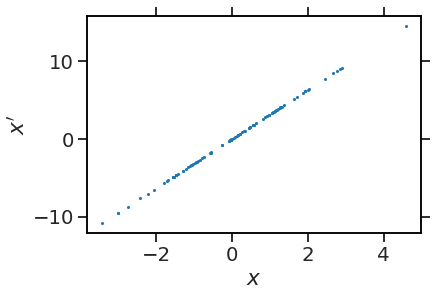

In [32]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

$\implies$ the problem of constant continuous quadrupole fields lies in that one plane focuses while the other plane <span style="color:red;"><b>de</b></span>focuses!

### 4. Simulating a FODO cell:

A F-0-D-0 cell is the <b>most common design type</b> for proton machine lattices!

It consists of a focusing quadrupole, drift space (0), defocusing quadrupole and again drift space (0):

<img src="img/lhc-cell.png" alt="LHC cell layout" style="width: 80%;" />

<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://indico.hep.manchester.ac.uk/getFile.py/access?resId=8&materialId=slides&confId=5922">G. Xia</a></p>

$\implies$ drift spaces are typically filled with dipole magnets (and instrumentation)

In [33]:
np.random.seed(12345)

In [34]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

In [35]:
ds = 0.1
k = 0.2

D = M_drift(ds)
Qfx = M_quad_x(ds, k)
Qdx = M_quad_x(ds, -k)

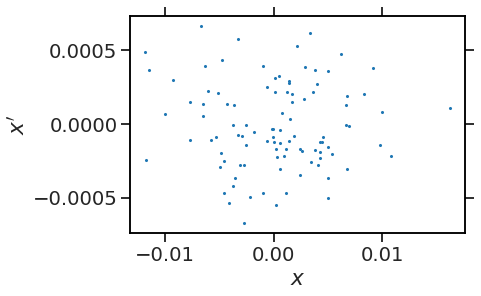

In [36]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

We assume a total FODO cell length of 10m and a length of each quadrupole magnet of 1m.

Tracking the FODO cell in the horizontal plane, starting from the centre of the focusing quadrupole (= horizontally focusing!):

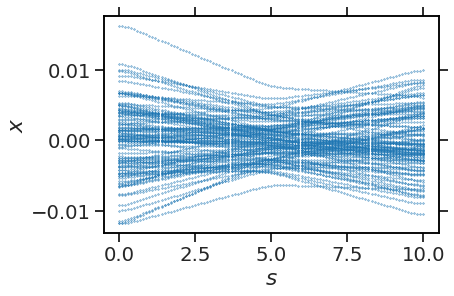

In [37]:
# 1/2 focusing quad
for s in np.arange(0, 0.5001, ds):
    x, xp = track(Qfx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# drift
for s in np.arange(0.5, 4.5001, ds)[1:]:
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# defocusing quad
for s in np.arange(4.5, 5.5001, ds)[1:]:
    x, xp = track(Qdx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# drift
for s in np.arange(5.5, 9.5001, ds)[1:]:
    x, xp = track(D, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
# 1/2 focusing quad
for s in np.arange(9.5, 10.0001, ds)[1:]:
    x, xp = track(Qfx, x, xp)
    plt.scatter(np.ones(N) * s, x, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$x$');

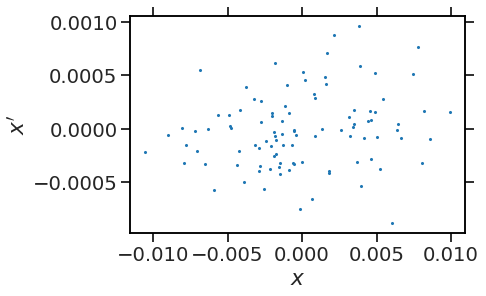

In [38]:
plt.scatter(x, xp, c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$");

What about the vertical plane now? The quadrupoles have their function inverted, a horizontally focusing quadrupole defocuses in the vertical plane, so the same lattice looks like "D-0-F-0" with respect to the vertical plane:

In [39]:
sig_y = 5e-3
sig_yp = 3e-4

y = np.random.normal(0, sig_y, N)
yp = np.random.normal(0, sig_yp, N)

In [40]:
Qfy = M_quad_y(ds, k)
Qdy = M_quad_y(ds, -k)

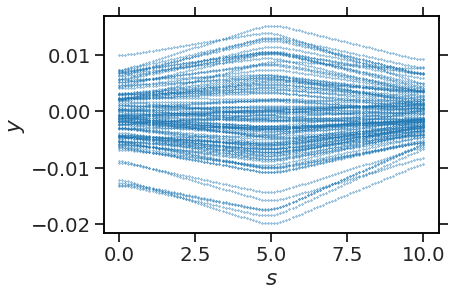

In [41]:
# 1/2 vertically defocusing quad (horizontally focusing, so "Qf")
for s in np.arange(0, 0.5001, ds):
    y, yp = track(Qfy, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# drift
for s in np.arange(0.5, 4.5001, ds)[1:]:
    y, yp = track(D, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# defocusing quad (horizontally defocusing, so "Qd")
for s in np.arange(4.5, 5.5001, ds)[1:]:
    y, yp = track(Qdy, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# drift
for s in np.arange(5.5, 9.5001, ds)[1:]:
    y, yp = track(D, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
# 1/2 focusing quad
for s in np.arange(9.5, 10.0001, ds)[1:]:
    y, yp = track(Qfy, y, yp)
    plt.scatter(np.ones(N) * s, y, c='C0', s=1, marker='.')
plt.xlabel('$s$')
plt.ylabel('$y$');

$\implies$ can ensure <b>quasi-harmonic motion</b> in both (!) transverse planes! Transverse confinement of beam by <b>alternating-gradient</b> (AG) focusing! This is the principle behind synchrotrons!

How does this look like over long time scales? Let us build the one-cell matrix and track for many cells:

In [42]:
M_cell = M_quad_x(0.5, k) # 1/2 focusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(1, -k)) # defocusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(0.5, k)) # 1/2 focusing quad

In [43]:
n_cells = 100

In [44]:
np.random.seed(12345)

In [45]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

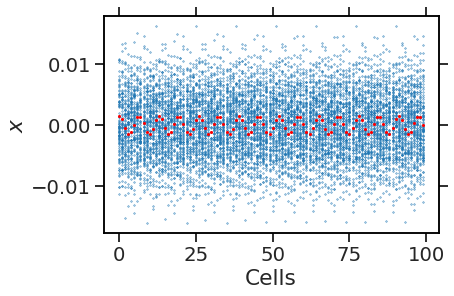

In [46]:
for i in range(n_cells):
    x, xp = track(M_cell, x, xp)
    
    plt.scatter(np.ones(N) * i, x, c='C0', s=1, marker='.')
    plt.scatter([i], [x[-1]], c='r', s=10, marker='.')
plt.xlabel('Cells')
plt.ylabel('$x$');

$\implies$ we observe regular motion, amplitudes remain bound! It looks like the magnet configuration is stable and the beam is well confined!

What about the phase-space trajectories at this position in the lattice (a so-called <b>Poincaré section</b>)?

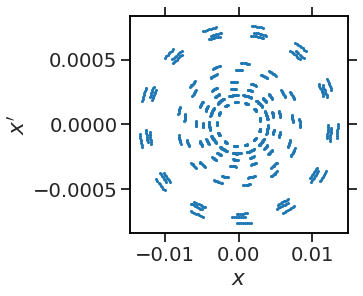

In [47]:
for i in range(n_cells):
    x, xp = track(M_cell, x, xp)
    plt.scatter(x[::10], xp[::10], c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.gca().set_aspect(np.diff(plt.xlim()) / np.diff(plt.ylim()));

$\implies$ the circles indicate linear bound motion!

### 5. What happens for increasingly strong $k$ in FODO?

<p style="color: #e6541a;">$\implies$ play with the quadrupole strength $k$ and observe what happens for stronger values!</p>

In [48]:
k = 0.431

In [49]:
M_cell = M_quad_x(0.5, k) # 1/2 focusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(1, -k)) # defocusing quad
M_cell = M_cell.dot(M_drift(4)) # drift
M_cell = M_cell.dot(M_quad_x(0.5, k)) # 1/2 focusing quad

In [50]:
n_cells = 100

In [51]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)

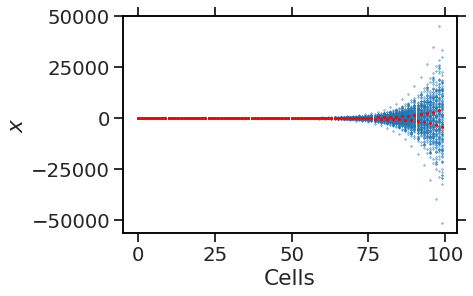

In [52]:
for i in range(n_cells):
    x, xp = track(M_cell, x, xp)
    plt.scatter(np.ones(N) * i, x, c='C0', s=1, marker='.')
    plt.scatter([i], [x[-1]], c='r', s=10, marker='.')
plt.xlabel('Cells')
plt.ylabel('$x$');

<h2>"Haste Makes Waste"</h2>

<img src="img/trying-hard.png" alt="over-focusing in FODO cell" style="width:80%;" />

<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://indico.hep.manchester.ac.uk/getFile.py/access?resId=8&materialId=slides&confId=5922">G. Xia</a></p>

$\implies$ motion becomes unstable! Is the one-cell matrix a "valid" (symplectic) betatron matrix?

In [53]:
np.linalg.det(M_cell)

0.9999999999999999

$\implies$ the matrix obeys $\det(\mathcal{M})=1$ and is thus symplectic. But what about the eigenvalues? 

Solve the characteristic polynomial of the one-cell matrix, $\det(\mathcal{M}-\lambda\mathbb{1}) = 0$ for $\lambda$:

In [54]:
np.linalg.eigvals(M_cell)

array([-0.87523826, -1.14254604])

$\implies$ we find one $|\lambda| > 1$! If one absolute eigenvalue becomes larger than unity, the magnet configuration becomes unstable! That explains the instability (exponential divergence) here! (Equivalently one finds $|\mathrm{Tr}(\mathcal{M})| > 2$, you can verify.)

What happens to a single particle in phase space in the Poincaré section?

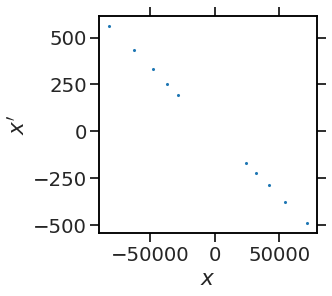

In [55]:
for i in range(10):
    x, xp = track(M_cell, x, xp)
    plt.scatter(x[0], xp[0], c='C0', s=10, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.gca().set_aspect(np.diff(plt.xlim()) / np.diff(plt.ylim()));

<p style="color: #e6541a;">$\implies$ compare to the stable phase-space portrait before! Can you explain what happens?</p>

### 6. Simulating a FODO cell with a sextupole:

We go back to the stable FODO cell configuration and add a thin sextupole magnet after 1/4 of the lattice, between the first focusing and the second defocusing quadrupole!

The sextupole kick provides a non-linearity in the potential that confines the particles. At large enough amplitude, the non-linear term dominates and the particles are no longer bound / confined!

We need to track in 4D phase-space (full transverse plane with both $x$ and $y$) as the sextupole provides coupling terms:

In [56]:
np.random.seed(12345)

We need a first matrix 1/4 of the cell until the sextupole, once for the $x$ (`M_cell_x_1`) and another one for the $y$ plane (`M_cell_y_1`). Then a second matrix each to track $x$ and $y$ for the remaining 3/4 of the cell (`M_cell_x_2`, `M_cell_y_2`):

In [57]:
k = 0.2
mL = 1.8

# horizontal plane:
M_cell_x_1 = M_quad_x(0.5, k) # 1/2 focusing quad
M_cell_x_1 = M_cell_x_1.dot(M_drift(2)) # drift
## here sits the sextupole
M_cell_x_2 = M_drift(2) # drift
M_cell_x_2 = M_cell_x_2.dot(M_quad_x(1, -k)) # defocusing quad
M_cell_x_2 = M_cell_x_2.dot(M_drift(4)) # drift
M_cell_x_2 = M_cell_x_2.dot(M_quad_x(0.5, k)) # 1/2 focusing quad

# vertical plane:
M_cell_y_1 = M_quad_y(0.5, k) # 1/2 focusing quad
M_cell_y_1 = M_cell_y_1.dot(M_drift(2)) # drift
## here sits the sextupole
M_cell_y_2 = M_drift(2) # drift
M_cell_y_2 = M_cell_y_2.dot(M_quad_y(1, -k)) # defocusing quad
M_cell_y_2 = M_cell_y_2.dot(M_drift(4)) # drift
M_cell_y_2 = M_cell_y_2.dot(M_quad_y(0.5, k)) # 1/2 focusing quad

In [58]:
n_cells = 1000

Initialise the transverse particle distribution:

In [59]:
N = 100
sig_x = 5e-3
sig_xp = 3e-4
sig_y = 5e-3
sig_yp = 3e-4

x = np.random.normal(0, sig_x, N)
xp = np.random.normal(0, sig_xp, N)
y = np.random.normal(0, sig_x, N)
yp = np.random.normal(0, sig_xp, N)

Let us record the horizontal phase-space coordinates during the tracking:

In [60]:
rec_x = np.zeros((n_cells, N), dtype=x.dtype)
rec_xp = np.zeros_like(rec_x)

Let us set the last particle to the same phase-space coordinates as the first particle up to a very small epsilon, for later:

In [61]:
x[-1] = x[0]
xp[-1] = xp[0]
y[-1] = y[0]
yp[-1] = yp[0] * 1.001

Let's go, the full 4D tracking loop comes here:

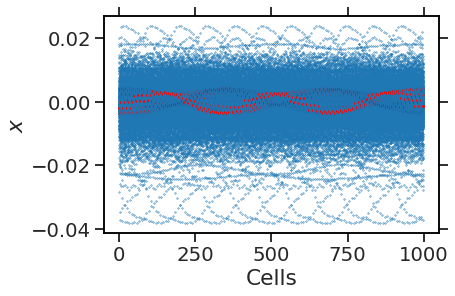

In [62]:
for i in range(n_cells):
    # initial 1/4 of the cell
    x, xp = track(M_cell_x_1, x, xp)
    y, yp = track(M_cell_y_1, y, yp)
    # sextupole
    x, xp, y, yp = track_sext_4D(x, xp, y, yp, mL)
    # remaining 3/4 of the cell
    x, xp = track(M_cell_x_2, x, xp)
    y, yp = track(M_cell_y_2, y, yp)
    
    plt.scatter(np.ones(N) * i, x, c='C0', s=1, marker='.')
    plt.scatter([i], [x[-1]], c='r', s=10, marker='.')
    
    rec_x[i] = x
    rec_xp[i] = xp
plt.xlabel('Cells')
plt.ylabel('$x$');

How does the horizontal phase-space (Poincare map) look like?

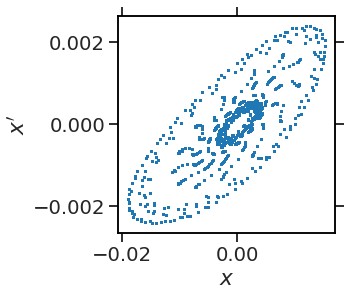

In [63]:
for i in range(n_cells):
    plt.scatter(rec_x[:100,::10], rec_xp[:100,::10], c='C0', s=1, marker='.')
plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.gca().set_aspect(np.diff(plt.xlim()) / np.diff(plt.ylim()));

$\implies$ single particles do not maintain the same (linear) amplitude (radius in $x-x'$) during the tracking!

A single particle looks like this:

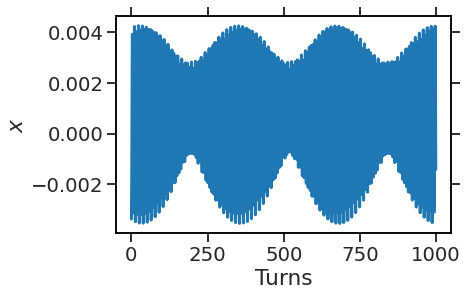

In [64]:
plt.plot(rec_x[:, 0])
plt.xlabel('Turns')
plt.ylabel('$x$');

$\implies$ distorted regular motion (see the asymmetry between positive and negative $x$ values in the oscillation), the particle is still bound but the sextupole deforms the phase-space topology from the regular circles we observed for purely linear tracking.

Remember, the last particle was just a copy from the first particle with a slightly increased $y'$ value. Let us investigate the difference in their horizontal position during the tracking: 

Text(0, 0.5, '$|\\Delta x|$')

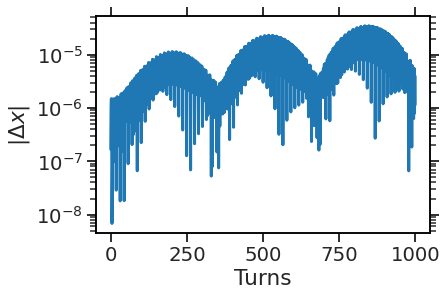

In [65]:
plt.plot(np.abs(rec_x[:,0] - rec_x[:,-1]))
plt.yscale('log')
plt.xlabel('Turns')
plt.ylabel(r'$|\Delta x|$')

$\implies$ for finite sextupole strength, we observe on average an exponential increase. This points to a <b>finite positive maximum Lyapunov exponent</b>, which is an early indicator of deterministic chaos (see lecture 3!)

All in all, the thin sextupole magnet in the lattice
- provides a non-linearity in the potential which the particles see
- distorts the regular motion in phase-space
- leads to a change of the (linear) amplitude in phase space
- provides deterministic chaos, in particular at larger amplitudes (positive Lyapunov exponent!)

<p style="color: #e6541a;">$\implies$ repeat this exercise with a zero sextupole strength $m=0$ to confirm these insights for yourself!</p>

<span style="color: #e6541a;"><i>Hint: in order to observe a meaningful result in the last plot, add a factor</i> </span> `* 1.001` <span style="color: #e6541a;"><i>to</i></span> `xp` <span style="color: #e6541a;"><i>for the last particle to see an effect. Due to the absent coupling between $x$ and $y$, there will be no difference in the $x$ motion of both particles without the sextupole!</i></span>

<h2>Summary</h2>

- magnetic fields to bend particles in the transverse plane (vs. electric fields)
- multipole representation (normal and skew coefficients $b_n,a_n$)
- dipole, quadrupole, sextupole fields
- <b>e</b>quation <b>o</b>f <b>m</b>otion in magnetic fields (after paraxial approximation)
- Hill differential equation
- betatron matrices for transport (solution to e.o.m.)
---
- drifts: divergence
- dipoles: bending included in Frenet-Serret coordinate system, geometric focusing
- quadrupoles: focus in one plane while defocusing in the other
- FODO cells: lattice with quadrupoles in alternating-gradient configuration (standard for proton synchrotrons)
- lattice instability for too strong quadrupoles
- sextupoles, non-linearity and deterministic chaos